#### Imports

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [2]:
import wrangle as w

In [3]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [4]:
import random 
random.seed(10)

In [ ]:
df = pd.read_csv('pivot_final.csv')

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df['year'] = df['year'].astype('object')
df_salaries = pd.read_csv('salaries_data')
df_salaries["full_name"] = df_salaries['0'].astype(str) +" "+ df_salaries["1"]
df['year'] = [str(x) for x in df['year']]

In [ ]:
df_salaries.head()

In [ ]:
def is_in(x):
    return x in ['2023','2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']
    
df_salaries = df_salaries[df_salaries['3'].apply(is_in)]

In [ ]:
df_salaries['3'].value_counts()

In [ ]:
test_df = df.merge(df_salaries[['full_name', '3','8']], 
                   left_on =['name', 'year'], 
                   right_on = ['full_name', '3'], how = 'outer')

In [ ]:
test_df.full_name = test_df.full_name.fillna(test_df.name)

In [ ]:
test_df[test_df.name=='Patrick Mahomes']

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
test_df[test_df.name.isnull() == False]

In [ ]:
test_df['year'][test_df['year'].isnull()] = test_df['3']

In [ ]:
test_df.head()

In [ ]:
test_df['name'] = np.where(test_df['name'].isnull(), test_df['full_name'], test_df['name'] )

In [ ]:
test_df = test_df.sort_values(by= ['name','year'])

In [ ]:
test_df.head()

In [ ]:
# test_df[['full_name','3','8']] = test_df[['full_name','3','8']].fillna(method='bfill')

In [ ]:
# test_df = test_df.dropna()

In [ ]:
# test_df = test_df.drop_duplicates()

In [ ]:
test_df.shape

In [ ]:
test_df[test_df.name == 'Patrick Mahomes']

In [ ]:
master_df = pd.DataFrame()

for i in set(test_df[test_df.name.isnull() == False].name):
    star = test_df[test_df.name == i]
    star = star.sort_values(by= ['name','year'])
    star[['full_name','3','8']] = star[['full_name','3','8']].fillna(method='bfill')
    master_df = pd.concat([master_df, star])

In [ ]:
master_df[master_df.name=='Tony Romo']

In [ ]:
master_df.shape

In [ ]:
master_df = master_df.dropna()

In [ ]:
master_df.shape

In [ ]:
master_df = master_df.rename(columns={'3': 'year_signed', '8': 'percent_of_cap'})

In [ ]:
master_df['percent_of_cap'] = master_df['percent_of_cap'].str.replace('%', '')
master_df['percent_of_cap'] = master_df['percent_of_cap'].astype(float)

In [ ]:
master_df.to_csv('pivot_final.csv', index=False)

In [5]:
df = pd.read_csv('pivot_final.csv')

# Explore

In [6]:
# SPLIT FUNCTION

def split_function(df):
    '''
    Take in a data frame and returns:
    train, validate, test 
    subset data frames
    '''
    train, test = train_test_split(df,
                              test_size=0.20,
                              random_state=123,
                                  )
    train, validate = train_test_split(train,
                                  test_size=.25,
                                  random_state=123,
                                      )
    return train, validate, test

In [7]:
train, validate, test = split_function(df)

In [8]:
print(train.shape[0])
print(validate.shape[0])
print(test.shape[0])

274
92
92


In [9]:
def stats_relationship(train, var1, target):
    sns.regplot(data=train, x=var1, y=target, line_kws={'color':'red'})
    plt.show()
    
    alpha = 0.05

    r, p = stats.spearmanr(train[var1], train[target])
    print('r =', r)
    print('p =', p)
    
    if p < alpha:
        print(f"There is a relationship between the {target} and the {var1} of QB's")
    else:
        print(f"There is not a relationship between the {target} and the {var1} of QB's")


In [10]:
train.head()

,name,team,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,full_name,year_signed,percent_of_cap
429,Ryan Fitzpatrick,NYJ,2015,16.0,335.0,562.0,59.6,3905.0,6.9,31.0,15.0,87.97,60.0,270.0,4.5,2.0,Ryan Fitzpatrick,2016,7.7
185,Brock Osweiler,HOU,2016,15.0,301.0,510.0,59.0,2957.0,5.8,15.0,16.0,72.16,30.0,131.0,4.4,2.0,Brock Osweiler,2016,11.6
148,Carson Palmer,ARI,2016,15.0,364.0,597.0,61.0,4233.0,7.1,26.0,14.0,87.18,14.0,38.0,2.7,0.0,Carson Palmer,2016,13.5
358,Mike Glennon,JAX,2020,5.0,111.0,179.0,62.0,1072.0,6.0,7.0,5.0,80.11,6.0,17.0,2.8,0.0,Mike Glennon,2020,0.1
91,Philip Rivers,LAC,2010,16.0,357.0,541.0,66.0,4710.0,8.7,30.0,13.0,101.82,29.0,52.0,1.8,0.0,Philip Rivers,2015,14.5


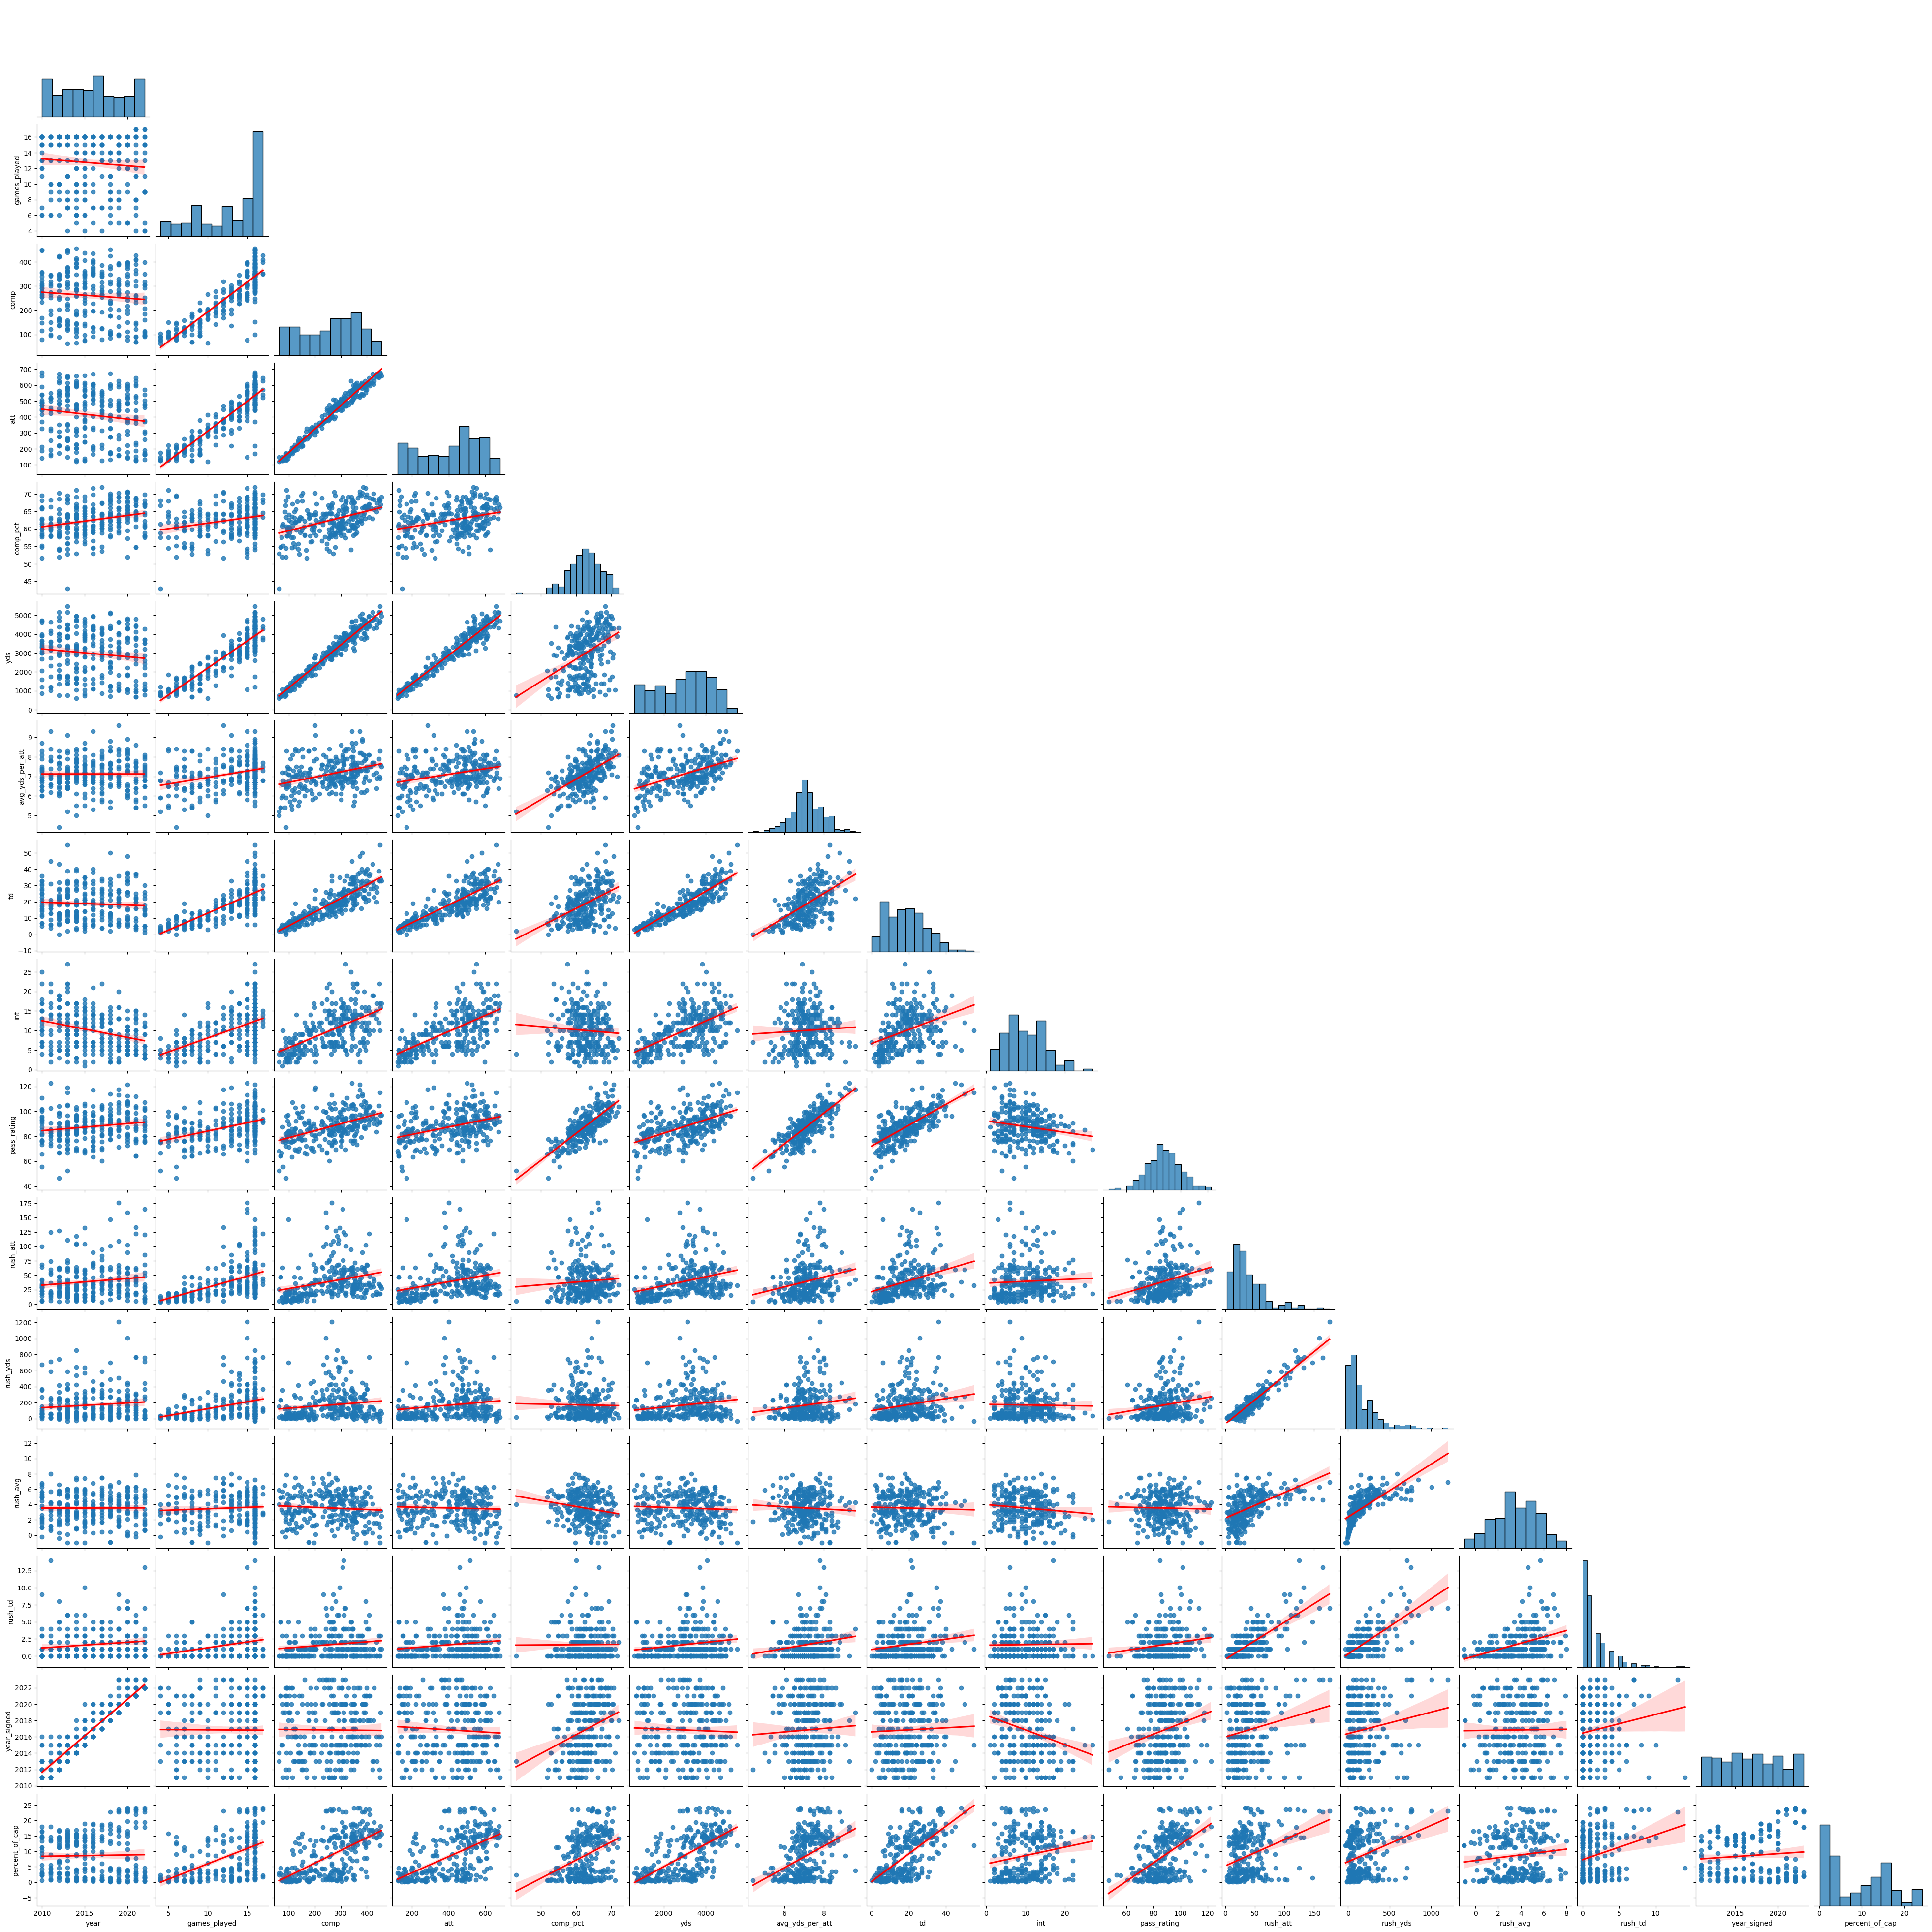

In [28]:
# create the pair plot with the reordered columns
sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}},corner=True)
plt.show()

In [12]:
feature_corr = train.corr(method='spearman')
feature_corr

,year,games_played,comp,att,comp_pct,yds,avg_yds_per_att,td,int,pass_rating,rush_att,rush_yds,rush_avg,rush_td,year_signed,percent_of_cap
year,1.000000,-0.086796,-0.069774,-0.134665,0.280994,-0.107126,0.014841,-0.063640,-0.296351,0.168253,0.124708,0.098944,0.008189,0.174564,0.937626,-0.031097
games_played,-0.086796,1.000000,0.868575,0.875318,0.272092,0.861235,0.290890,0.793297,0.537291,0.408293,0.550831,0.346614,0.038016,0.288202,-0.008831,0.568187
comp,-0.069774,0.868575,1.000000,0.981635,0.451577,0.972306,0.352230,0.880626,0.587858,0.502822,0.385952,0.175756,-0.091424,0.163865,0.000647,0.642491
att,-0.134665,0.875318,0.981635,1.000000,0.305142,0.957719,0.265786,0.851810,0.651483,0.390513,0.385299,0.189542,-0.068211,0.162475,-0.062641,0.611681
comp_pct,0.280994,0.272092,0.451577,0.305142,1.000000,0.420780,0.565549,0.450957,-0.071057,0.767211,0.108110,-0.046378,-0.189348,0.045652,0.297328,0.349298
yds,-0.107126,0.861235,0.972306,0.957719,0.420780,1.000000,0.490166,0.916060,0.583350,0.554260,0.420125,0.209667,-0.062968,0.197251,-0.029258,0.666755
avg_yds_per_att,0.014841,0.290890,0.352230,0.265786,0.565549,0.490166,1.000000,0.549296,0.061510,0.779613,0.250130,0.110515,-0.045324,0.173413,0.051334,0.394267
td,-0.063640,0.793297,0.880626,0.851810,0.450957,0.916060,0.549296,1.000000,0.442852,0.704057,0.466862,0.262666,-0.008636,0.205365,0.032142,0.676570
int,-0.296351,0.537291,0.587858,0.651483,-0.071057,0.583350,0.061510,0.442852,1.000000,-0.156083,0.156788,0.044170,-0.102850,0.029897,-0.249620,0.244580
pass_rating,0.168253,0.408293,0.502822,0.390513,0.767211,0.554260,0.779613,0.704057,-0.156083,1.000000,0.342182,0.181805,-0.007171,0.175531,0.218429,0.525046


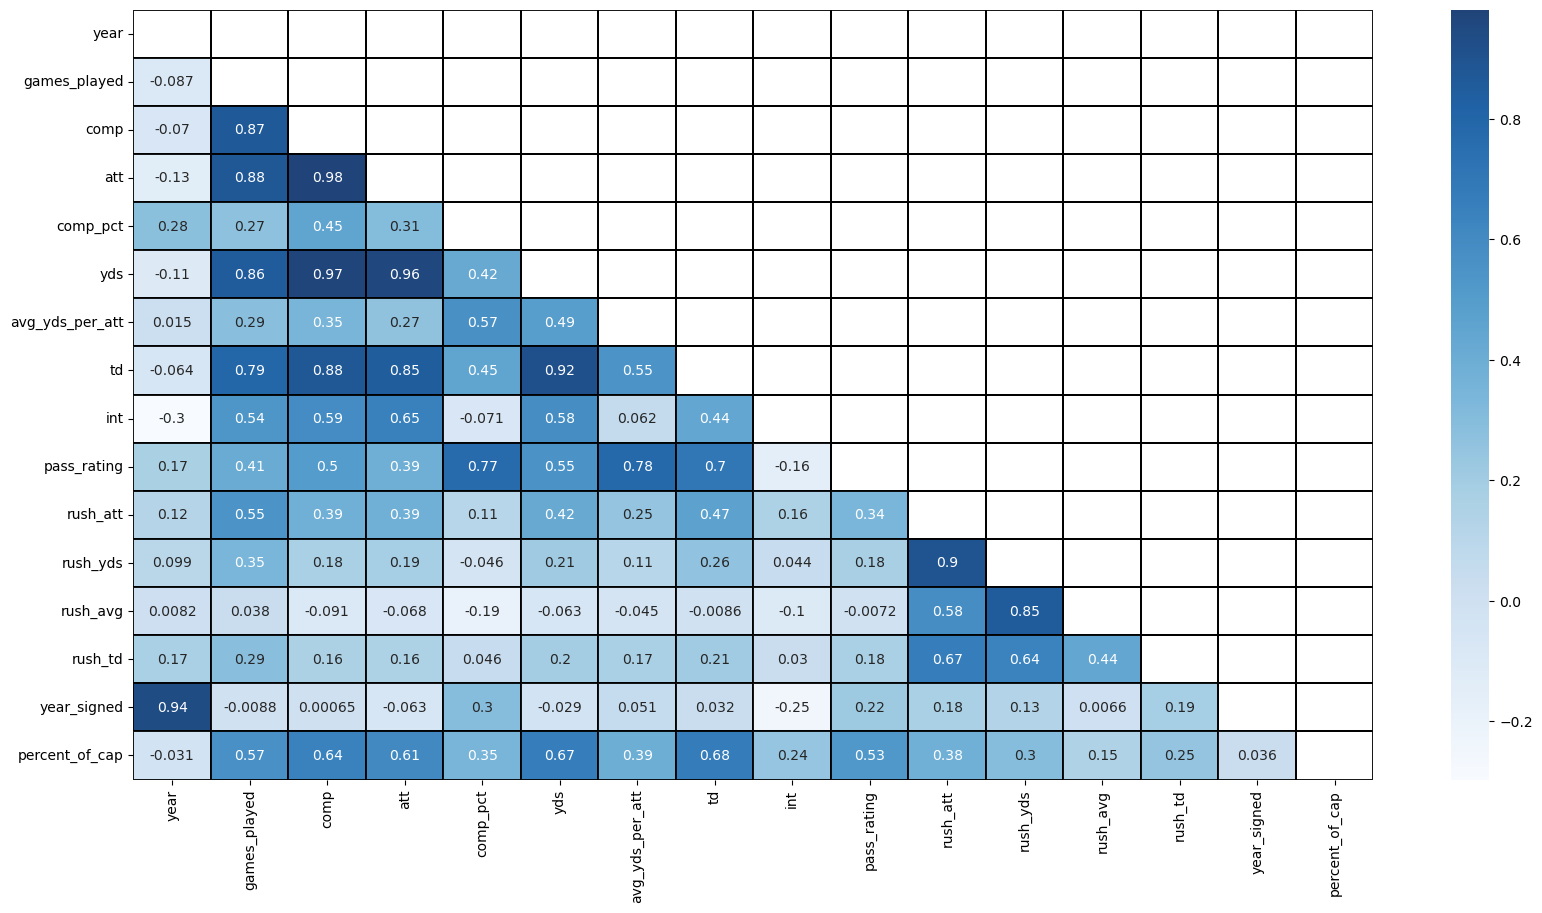

In [13]:
kwargs= {'alpha':.9, 'linewidth':.3, 'linestyle':'-',
        'linecolor':'k', 'rasterized':False, 'edgecolor':'w',
        'capstyle':'projecting',}

plt.figure(figsize=(20,10))
sns.heatmap(feature_corr, cmap='Blues', annot=True, mask = np.triu(feature_corr), **kwargs)


plt.show()

In [14]:
def correlation_tests(train, columns_list, target):
    '''
    Runs a correlation test on dataframe features vs target variable
    '''
    corr_df = pd.DataFrame({'feature': [],
                        'r': [],
                       'p': []})
    for i, col in enumerate(train[columns_list]):
        r, p = stats.pearsonr(train[col], train[target])
        corr_df.loc[i] = [col, abs(r), p]
    to_return = corr_df.sort_values(by='r', ascending=False)
    to_return['target'] = target
    return to_return

In [16]:
columns_list = df.select_dtypes(exclude=['object']).columns.to_list()
target = columns_list.pop(len(columns_list) -1 )

In [17]:
columns_list

['year',
 'games_played',
 'comp',
 'att',
 'comp_pct',
 'yds',
 'avg_yds_per_att',
 'td',
 'int',
 'pass_rating',
 'rush_att',
 'rush_yds',
 'rush_avg',
 'rush_td',
 'year_signed']

In [18]:
correlation_tests(train, columns_list, target).reset_index().drop(columns = 'index')

,feature,r,p,target
0,td,0.659816,1.270811e-35,percent_of_cap
1,yds,0.637262,1.265687e-32,percent_of_cap
2,comp,0.614637,7.406060e-30,percent_of_cap
3,att,0.585140,1.438324e-26,percent_of_cap
4,games_played,0.529220,3.530487e-21,percent_of_cap
5,pass_rating,0.515319,5.476469e-20,percent_of_cap
6,avg_yds_per_att,0.394771,1.183529e-11,percent_of_cap
7,rush_att,0.365736,4.265655e-10,percent_of_cap
8,comp_pct,0.365580,4.344439e-10,percent_of_cap
9,rush_yds,0.318609,7.008358e-08,percent_of_cap


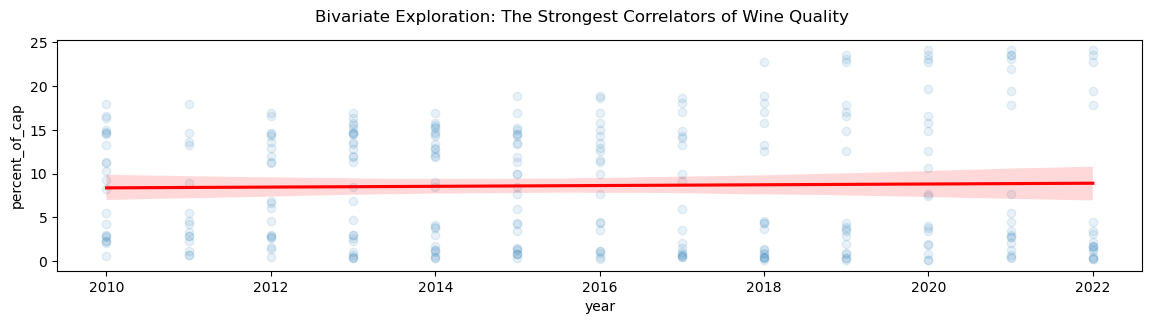

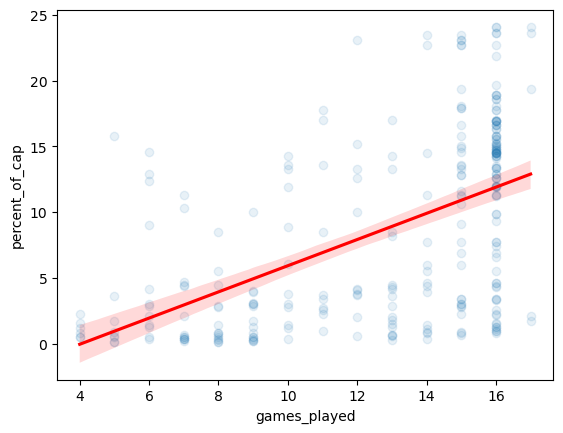

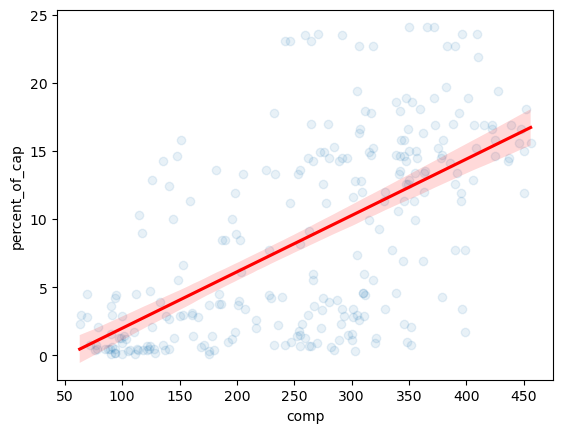

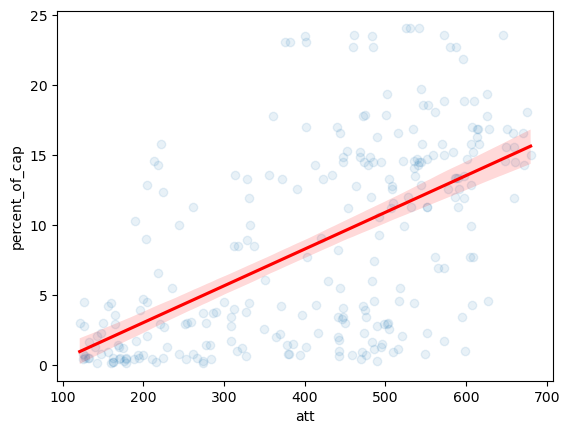

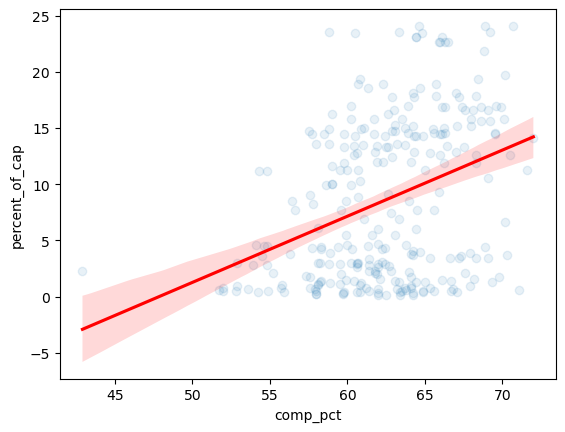

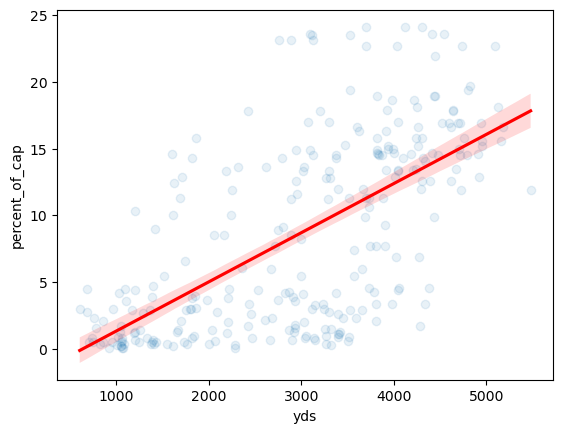

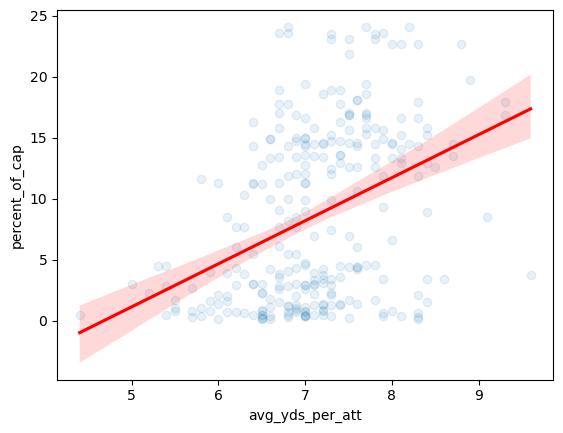

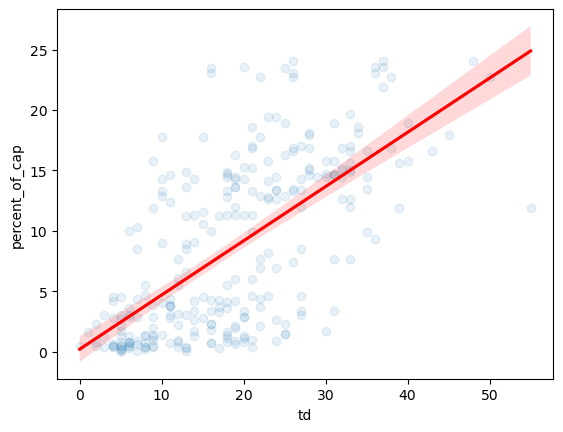

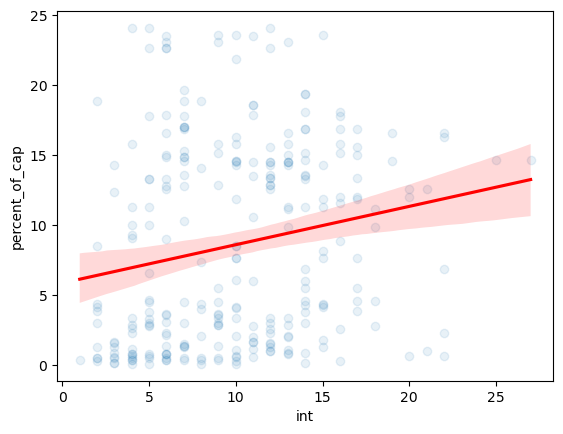

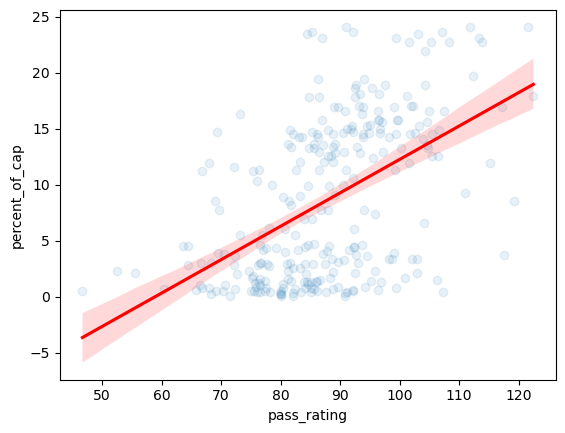

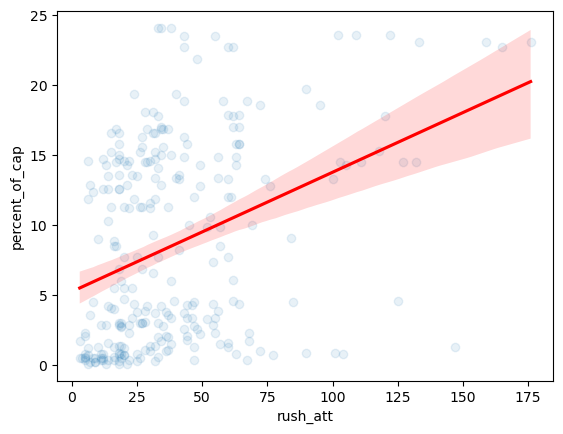

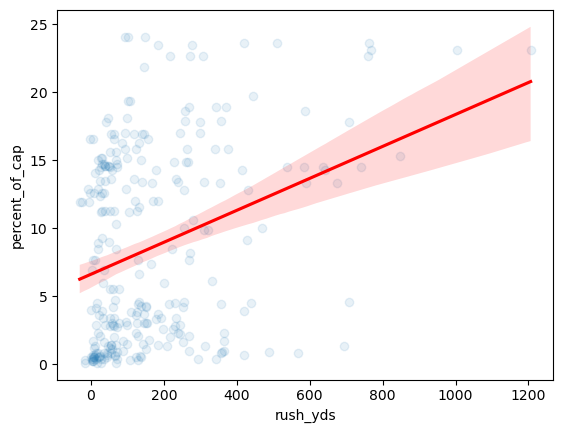

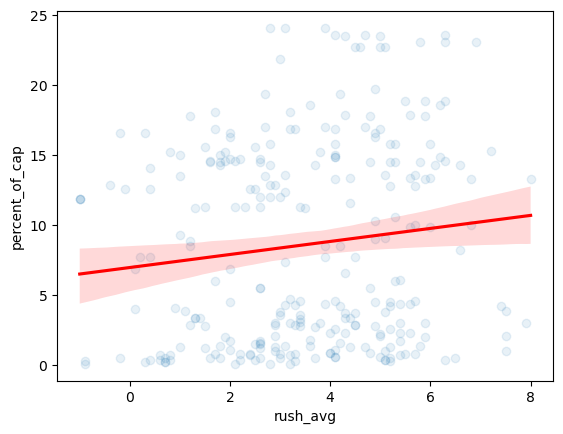

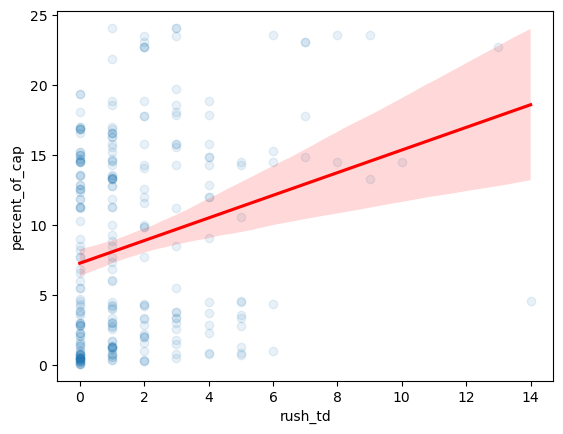

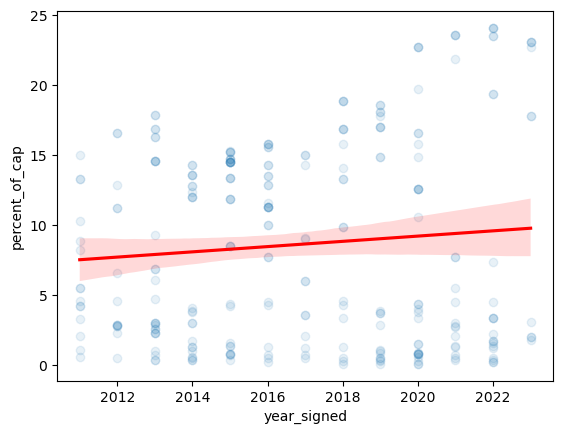

In [19]:
w.correlation_charts(train, columns_list, target)

In [20]:
X_train, X_validate, X_test, y_train, y_validate, y_test = w.get_X_train_val_test(train, validate, test, columns_list, target)                                                                           

In [21]:
X_train, X_validate, X_test = w.scale_data(X_train, X_validate, X_test, cols = columns_list)

In [22]:
df1, df2, df3 = w.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:294: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [23]:
df1

,model_train,rmse,r2
0,baseline,7.105521,0.000000
1,ordinary least squared(OLS),4.860365,0.532108
2,lasso lars(lars),7.105521,0.000000
3,Polynomial Regression(poly2),5.467905,0.407825
4,Generalized Linear Model (GLM),5.190493,0.466388


In [24]:
df2

,model_validate,rmse,r2
0,baseline,7.105521,0.000000
1,ordinary least squared(OLS),5.484955,0.448555
2,lasso lars(lars),7.404991,-0.005090
3,Polynomial Regression(poly2),10.378546,-0.974372
4,Generalized Linear Model (GLM),5.967987,0.347152


In [25]:
df3

,model_validate,rmse,r2
0,baseline,7.105521,0.000000
1,ordinary least squared(OLS),4.501253,0.501748
2,lasso lars(lars),6.564151,-0.059593
3,Polynomial Regression(poly2),8.760000,-0.888175
4,Generalized Linear Model (GLM),5.317413,0.304683


In [33]:
pd.read_csv('2022.csv')

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Player-additional
0,1,Patrick Mahomes*+,KAN,27,QB,17,17,14-3-0,435,648,...,105.2,77.6,26,188,3.9,7.51,7.93,4.0,4.0,MahoPa00
1,2,Justin Herbert,LAC,24,QB,17,17,10-7-0,477,699,...,93.2,58.2,38,206,5.2,6.15,6.22,4.0,5.0,HerbJu00
2,3,Tom Brady,TAM,45,QB,17,17,8-9-0,490,733,...,90.7,52.5,22,160,2.9,6.01,6.13,4.0,5.0,BradTo00
3,4,Kirk Cousins*,MIN,34,QB,17,17,13-4-0,424,643,...,92.5,49.9,46,329,6.7,6.12,6.05,8.0,8.0,CousKi00
4,5,Joe Burrow*,CIN,26,QB,16,16,12-4-0,414,606,...,100.8,58.7,41,259,6.3,6.52,6.76,3.0,4.0,BurrJo01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,Christian Kirk,JAX,26,WR,17,17,NaN,0,1,...,39.6,9.9,0,0,0.0,0.00,0.00,NaN,NaN,KirkCh01
102,103,Cooper Kupp,LAR,29,WR,9,9,NaN,0,1,...,39.6,3.0,0,0,0.0,0.00,0.00,NaN,NaN,KuppCo00
103,104,James Proche,BAL,26,WR,15,0,NaN,0,1,...,0.0,0.0,0,0,0.0,0.00,-45.00,NaN,NaN,ProcJa00
104,105,Tommy Townsend*+,KAN,26,P,17,0,NaN,0,1,...,39.6,NaN,0,0,0.0,0.00,0.00,NaN,NaN,TownTo01
